In [117]:
# Import All libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [118]:
# Step 1: Data Loading 
data = pd.read_csv("laptopPrice.csv")
data.head(5)


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [119]:
# Step 2: Data Exploration
print("First 5 rows:\n")
data.head()


First 5 rows:



,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [120]:
print("\nDataset Info:\n")
data.info()




Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-n

In [121]:
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [122]:
# Feature Engineering
# Drop irrelevant columns
data = data.drop(['Number of Ratings', 'Number of Reviews'], axis=1)  # Assuming these don't impact price

data.head(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars


In [123]:
# Encode Categorical Variables and convert 'No' to 0 and 'Yes' to 1
binary_cols = ['Touchscreen', 'msoffice']
data[binary_cols] = data[binary_cols].replace({'No': 0, 'Yes': 1})

le = LabelEncoder()
categorical_cols = ['brand', 'processor_brand', 'processor_name', 'ram_type', 'os', 'graphic_card_gb', 'warranty', 'weight', 'processor_gnrtn', 'os_bit', 'rating']

for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))

data.head(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating
0,1,1,1,0,4 GB,1,0 GB,1024 GB,2,1,0,0,3,0,0,34649,1
1,5,1,1,0,4 GB,1,0 GB,1024 GB,2,1,0,0,3,0,0,38999,2
2,5,1,1,0,4 GB,1,0 GB,1024 GB,2,1,0,0,3,0,0,39999,2
3,1,1,2,0,8 GB,1,512 GB,0 GB,2,0,1,0,3,0,0,69990,2
4,1,1,0,7,4 GB,1,0 GB,512 GB,2,1,0,0,3,0,0,26990,2


In [124]:
# Feature Transformation
# Convert RAM, HDD, SSD to numeric
data['ram_gb'] = data['ram_gb'].str.replace(' GB', '').astype(int)
data['ssd'] = data['ssd'].str.replace(' GB', '').astype(int)
data['hdd'] = data['hdd'].str.replace(' GB', '').astype(int)

# Combine HDD and SSD as Total Storage
data['total_storage'] = data['ssd'] + data['hdd']
data.drop(['hdd', 'ssd'], axis=1, inplace=True)

# Ensure all features are numeric
print("\nProcessed Data:\n", data.head())




Processed Data:
    brand  processor_brand  processor_name  processor_gnrtn  ram_gb  ram_type  \
0      1                1               1                0       4         1   
1      5                1               1                0       4         1   
2      5                1               1                0       4         1   
3      1                1               2                0       8         1   
4      1                1               0                7       4         1   

   os  os_bit  graphic_card_gb  weight  warranty  Touchscreen  msoffice  \
0   2       1                0       0         3            0         0   
1   2       1                0       0         3            0         0   
2   2       1                0       0         3            0         0   
3   2       0                1       0         3            0         0   
4   2       1                0       0         3            0         0   

   Price  rating  total_storage  
0  34649       1

In [125]:
# Step 4: Train-Test Split
X = data.drop(columns=['Price'])
y = data['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
len(X_test)

165

In [126]:
# Step 5: Model Training and Selection
# Random Forest and Gradient Boosting
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")



RandomForest - RMSE: 27562.30, MAE: 14068.77
GradientBoosting - RMSE: 24813.20, MAE: 12887.57


In [127]:
# Step 6: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("\nBest Random Forest Model RMSE:", rmse_best)




Best Random Forest Model RMSE: 27536.2345693257


In [128]:
# Step 7: Save Results and Model
import joblib
joblib.dump(best_model, "laptop_price_predictor.pkl")
print("\nModel saved as 'laptop_price_predictor.pkl'")



Model saved as 'laptop_price_predictor.pkl'


In [129]:
model.score(X_test,y_test)

0.6840658371012154

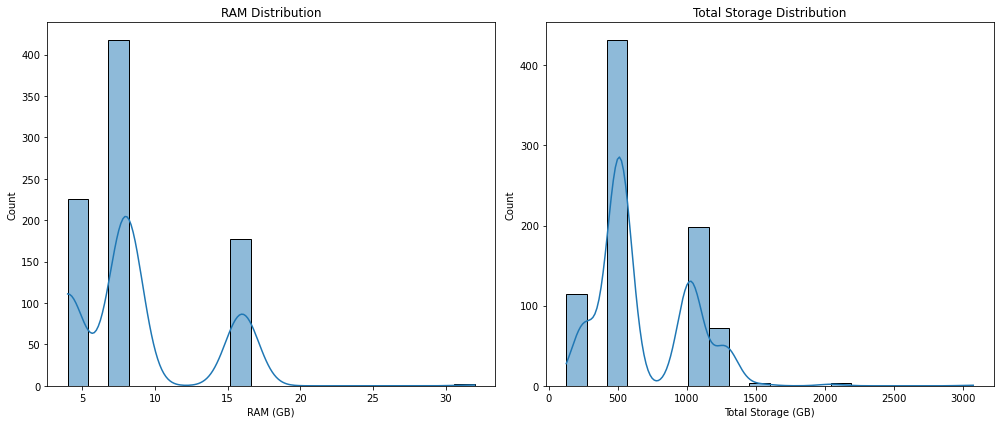

In [130]:
# Visualizing the distribution of 'ram_gb' and 'total_storage'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data['ram_gb'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('RAM Distribution')
axes[0].set_xlabel('RAM (GB)')


sns.histplot(data['total_storage'], kde=True, bins=20, ax=axes[1])
axes[1].set_title('Total Storage Distribution')
axes[1].set_xlabel('Total Storage (GB)')

plt.tight_layout()
plt.show()


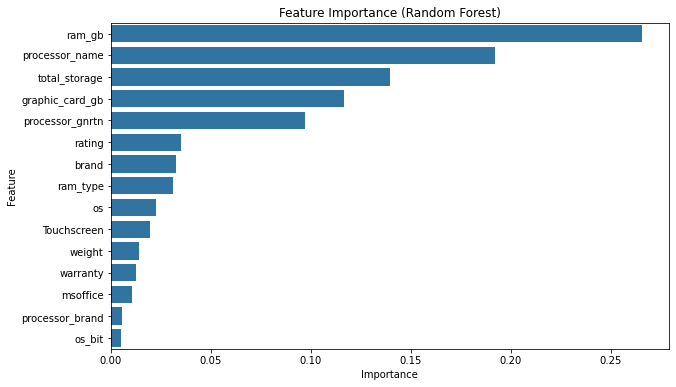

In [131]:
# Plotting feature importance for Random Forest
feature_importance = models['RandomForest'].feature_importances_
features = X.columns

# Creating a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


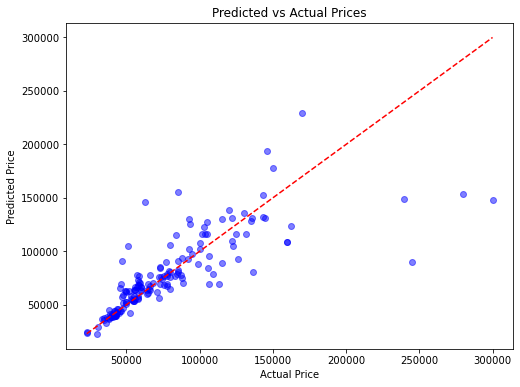

In [132]:
# Predicted vs Actual prices
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


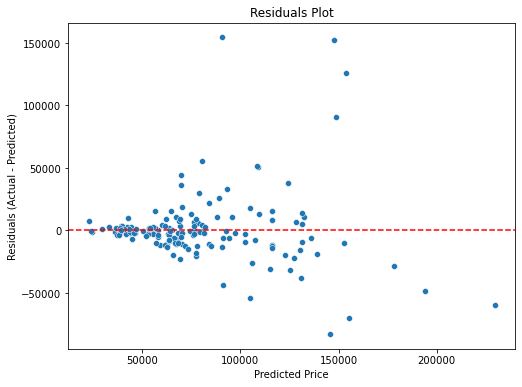

In [133]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


In [134]:
# Prediction of data
model.predict([[1,	1,	1,	0,	4,	1,	2,	1,	0,	0,	3,	0,	0,	1,	1024]])

array([344160.61937159])